In [1]:

# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


In [2]:
# set input directory
input_dir = 'input'

In [3]:
# set dataset file name
input_data_file = 'data.xlsx'

In [4]:
# display list of files in input directory
os.listdir('input')

['data.xlsx', 'labeled_data.csv']

In [5]:
# to get the input data path
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'.\\input\\data.xlsx'

In [6]:
# to read data from excel file
raw_data = pd.read_excel(data_path)

In [7]:
raw_data.head()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
0,16,2.1,0.79,0.14,1.2,16,17,37,177,78x,57,12
1,16,2.1,0.8,0.15,1.3,16,17,36,178,77x,57,11
2,16,2.1,0.71,0.13,1,13,14,38,163,72x,57,8
3,15,2,0.66,0.12,0.8,11,12,39,147,65x,58,6.5
4,15,2,0.53,0.11,0.6,10,11,38,131,56x,58,5.5


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
TEMP     200169 non-null object
CH4      95822 non-null object
CO       217310 non-null object
NMHC     95614 non-null object
NO       217227 non-null object
NO2      216681 non-null object
NOx      217228 non-null object
O3       199864 non-null object
PM10     215761 non-null object
PM2.5    215768 non-null object
RH       200243 non-null object
SO2      217046 non-null object
dtypes: object(12)
memory usage: 20.0+ MB


In [9]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [10]:
raw_data.isna().sum()

TEMP      18470
CH4      122817
CO         1329
NMHC     123025
NO         1412
NO2        1958
NOx        1411
O3        18775
PM10       2878
PM2.5      2871
RH        18396
SO2        1593
dtype: int64

In [11]:
# drop rows which contains nan
raw_data.dropna(axis = 0, inplace=True)

In [12]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [13]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [14]:
raw_data['O3'] = raw_data['O3'].apply(numeric)
#print(raw_data['NO'].describe())

In [15]:
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)

In [16]:
raw_data = raw_data[0:100000]

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77393 entries, 0 to 218638
Data columns (total 12 columns):
TEMP     77393 non-null float64
CH4      77393 non-null float64
CO       77393 non-null float64
NMHC     77393 non-null float64
NO       77393 non-null float64
NO2      77393 non-null float64
NOx      77393 non-null float64
O3       77393 non-null float64
PM10     77393 non-null float64
PM2.5    77393 non-null float64
RH       77393 non-null float64
SO2      77393 non-null float64
dtypes: float64(12)
memory usage: 7.7 MB


In [18]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,77393.000000,77393.000000,77393.000000,77393.000000,77393.000000,77393.000000,77393.000000,77393.000000,77393.00000,77393.000000,77393.000000,77393.000000
mean,23.715404,1.908536,0.614237,0.216868,8.490418,19.957742,28.444097,26.494051,42.19556,19.629631,74.921957,3.325438
std,5.700769,0.196859,0.447480,0.186840,12.501569,11.304259,20.846717,17.861120,71.75423,20.874100,12.503552,3.140954
min,-12.100000,-0.700000,-0.090000,-8.240000,-8.500000,-2.100000,-0.600000,-4.400000,-64.00000,-57.000000,0.000000,-7.800000
25%,19.000000,1.800000,0.340000,0.100000,1.800000,11.000000,14.000000,12.000000,25.00000,10.000000,66.000000,1.700000
50%,24.000000,1.900000,0.500000,0.170000,3.900000,18.000000,24.000000,25.000000,37.00000,16.000000,77.000000,2.600000
75%,28.000000,2.000000,0.750000,0.280000,9.900000,27.000000,37.000000,38.000000,51.00000,25.000000,85.000000,4.000000
max,59.000000,10.000000,34.540000,3.510000,313.000000,108.000000,370.000000,200.000000,5004.00000,941.000000,100.000000,368.000000


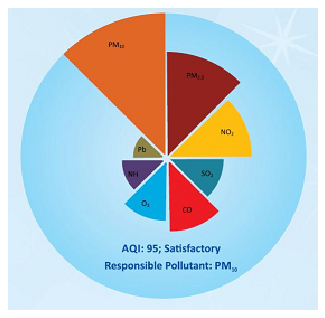

In [19]:
plt.figure(figsize=(12,5), dpi=80)
image = plt.imread('img/significance.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [20]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [21]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.79,16.0,37.0,177.0,78.0,12.0
1,0.80,16.0,36.0,178.0,77.0,11.0
2,0.71,13.0,38.0,163.0,72.0,8.0
3,0.66,11.0,39.0,147.0,65.0,6.5
4,0.53,10.0,38.0,131.0,56.0,5.5


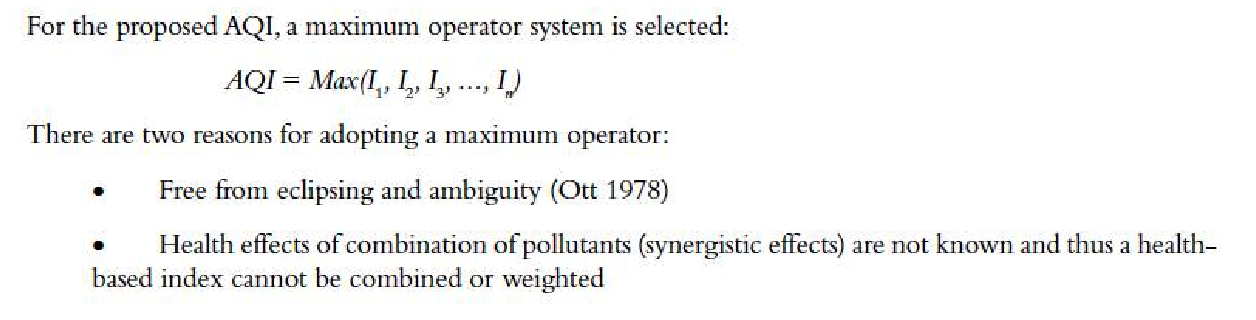

In [22]:
plt.figure(figsize=(20,10), dpi=80)
image = plt.imread('img/aqi.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [23]:
data['AQI']= data.max(axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI
0,0.79,16.0,37.0,177.0,78.0,12.0,177.0
1,0.80,16.0,36.0,178.0,77.0,11.0,178.0
2,0.71,13.0,38.0,163.0,72.0,8.0,163.0
3,0.66,11.0,39.0,147.0,65.0,6.5,147.0
4,0.53,10.0,38.0,131.0,56.0,5.5,131.0


In [24]:
data['AQI'].describe()

count    77393.000000
mean        47.423785
std         71.880272
min          5.000000
25%         32.000000
50%         41.000000
75%         55.000000
max       5004.000000
Name: AQI, dtype: float64

In [25]:
aqi = data['AQI']
#aqi

In [26]:
aqi

0         177.0
1         178.0
2         163.0
3         147.0
4         131.0
          ...  
218634    129.0
218635    132.0
218636    130.0
218637    120.0
218638    120.0
Name: AQI, Length: 77393, dtype: float64

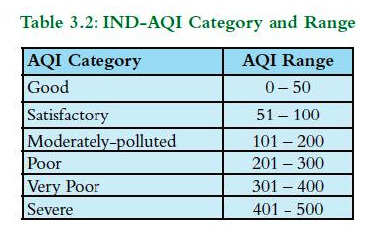

In [27]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('img/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [28]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 200)] = 2
aqi[(aqi > 201) & (aqi <= 300)] = 3
aqi[(aqi > 301) & (aqi <= 400)] = 4
aqi[(aqi > 401)] = 5

In [29]:
aqi

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
218634    2.0
218635    2.0
218636    2.0
218637    2.0
218638    2.0
Name: AQI, Length: 77393, dtype: float64

In [30]:
aqi.unique()

array([  2.,   4.,   1.,   0.,   5.,   3., 301., 201.])

In [31]:
data['label'] = data['AQI'].astype('int8')

In [32]:
data

,CO,NO2,O3,PM10,PM2.5,SO2,AQI,label
0,0.79,16.0,37.0,177.0,78.0,12.0,2.0,2
1,0.80,16.0,36.0,178.0,77.0,11.0,2.0,2
2,0.71,13.0,38.0,163.0,72.0,8.0,2.0,2
3,0.66,11.0,39.0,147.0,65.0,6.5,2.0,2
4,0.53,10.0,38.0,131.0,56.0,5.5,2.0,2
...,...,...,...,...,...,...,...,...
218634,1.05,39.0,35.0,129.0,72.0,4.5,2.0,2
218635,0.96,37.0,31.0,132.0,79.0,3.7,2.0,2
218636,0.82,28.0,34.0,130.0,71.0,3.5,2.0,2
218637,0.88,32.0,27.0,120.0,76.0,4.6,2.0,2


In [33]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [34]:
data.tail()

,CO,NO2,O3,PM10,PM2.5,SO2,label
218634,1.05,39.0,35.0,129.0,72.0,4.5,2
218635,0.96,37.0,31.0,132.0,79.0,3.7,2
218636,0.82,28.0,34.0,130.0,71.0,3.5,2
218637,0.88,32.0,27.0,120.0,76.0,4.6,2
218638,0.84,29.0,29.0,120.0,76.0,3.4,2


In [35]:
temp_data.head()

,TEMP,RH,CH4,NMHC,NO,NOx
0,16.0,57.0,2.1,0.14,1.2,17.0
1,16.0,57.0,2.1,0.15,1.3,17.0
2,16.0,57.0,2.1,0.13,1.0,14.0
3,15.0,58.0,2.0,0.12,0.8,12.0
4,15.0,58.0,2.0,0.11,0.6,11.0


In [36]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77393 entries, 0 to 218638
Data columns (total 6 columns):
TEMP    77393 non-null float64
RH      77393 non-null float64
CH4     77393 non-null float64
NMHC    77393 non-null float64
NO      77393 non-null float64
NOx     77393 non-null float64
dtypes: float64(6)
memory usage: 4.1 MB


In [37]:
data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            218629, 218630, 218631, 218632, 218633, 218634, 218635, 218636,
            218637, 218638],
           dtype='int64', length=77393)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77393 entries, 0 to 218638
Data columns (total 7 columns):
CO       77393 non-null float64
NO2      77393 non-null float64
O3       77393 non-null float64
PM10     77393 non-null float64
PM2.5    77393 non-null float64
SO2      77393 non-null float64
label    77393 non-null int8
dtypes: float64(6), int8(1)
memory usage: 4.2 MB


In [39]:
data = temp_data.join(data)

In [40]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,2
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,2
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,2
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


In [41]:
#save the labeled data
data.to_csv('input/labeled_data.csv',index=True)

# Data Preprocessing and Labeling Completed

# Data Analysis

In [42]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,2
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,2
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,2
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


In [143]:
# sns.pairplot(data)

In [144]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='PM2.5',y='RH',data=data)

In [145]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='CH4',y='RH',data=data)

In [146]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='CH4',y='NOx',data=data)

In [147]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='CO',y='SO2',data=data)

In [148]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='NO2',y='O3',data=data)

In [149]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='TEMP',y='RH',data=data)

In [150]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x='NO2',y='CO',data=data)

# Train Test Split

Now its time to split our data into a training set and a testing set!

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
X_train.to_excel('Traning_Testing/X_train.xlsx')
X_test.to_excel('Traning_Testing/X_test.xlsx')
y_train.to_excel('Traning_Testing/y_train.xlsx')
y_test.to_excel('Traning_Testing/y_test.xlsx')

# Training the Random Forest model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=600)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predictions

In [49]:
predictions = rfc.predict(X_test)

In [50]:
predictions

array([0, 1, 0, ..., 1, 0, 0], dtype=int8)

**Now create a classification report from the results**

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
rfaccuracy = accuracy_score(y_test, predictions)
print(rfaccuracy)

0.9991601524646295


In [53]:
rfcf=classification_report(y_test,predictions)
print(rfcf)

              precision    recall  f1-score   support

         -55       0.00      0.00      0.00         1
           0       1.00      1.00      1.00     10750
           1       1.00      1.00      1.00      4236
           2       0.99      1.00      0.99       482
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.67      0.50      0.57         4

    accuracy                           1.00     15479
   macro avg       0.52      0.50      0.51     15479
weighted avg       1.00      1.00      1.00     15479



C:\Users\SAPAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(confusion_matrix(y_test,predictions))

[[    0     0     0     1     0     0     0]
 [    0 10750     0     0     0     0     0]
 [    0     2  4234     0     0     0     0]
 [    0     0     2   480     0     0     0]
 [    0     0     3     2     0     0     0]
 [    0     0     0     0     0     0     1]
 [    0     0     1     1     0     0     2]]


In [55]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [56]:

CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()


In [57]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [58]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [59]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [60]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [61]:
def checkPM10(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM10-->  %2.3f    %s' %(q, v))

In [62]:
def checkPM2_5(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM10-->  %2.3f    %s' %(q, v))

# Air Quality Analysis

CO-->  0.613    Good
SO2-->  3.327    Good
NO2-->  19.873    Good
O3-->  26.579    Good
PM10-->  41.925    Good


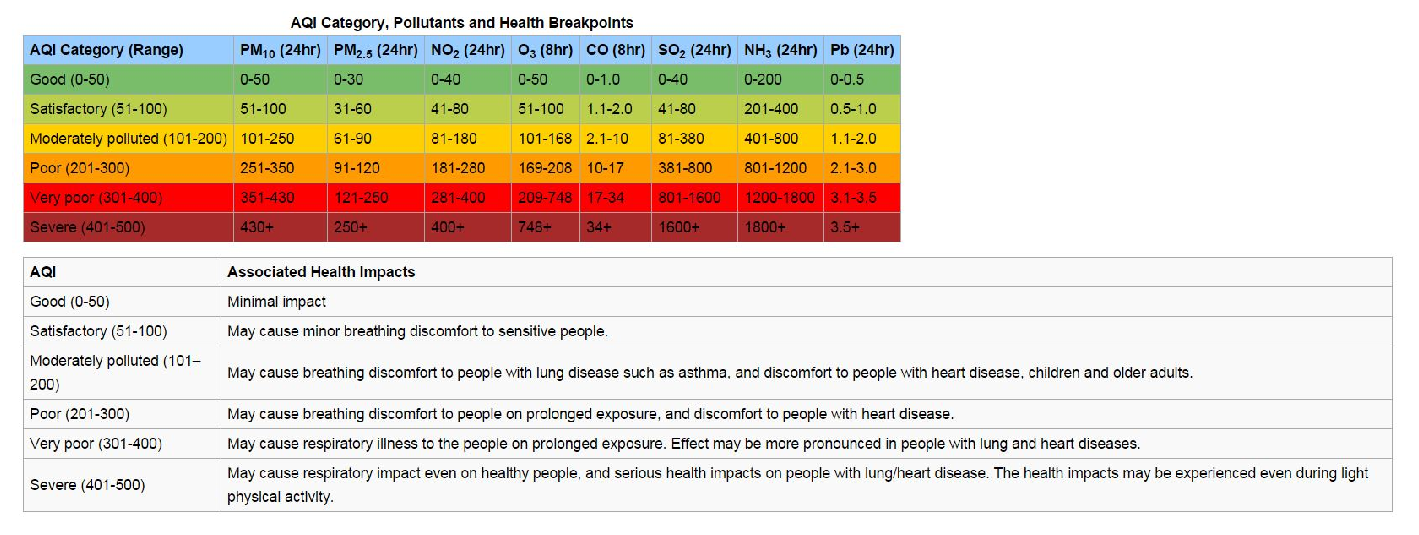

In [63]:
#l = [checkCo(0.25), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM10(PM10_mean)]
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/1a.png')
plt.axis('off')
plt.imshow(image)
plt.show()

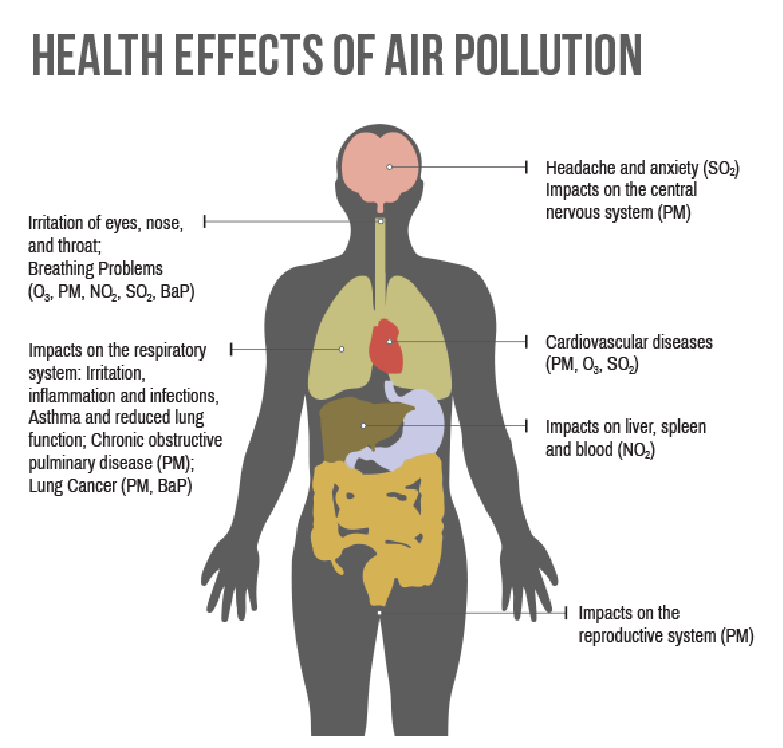

In [64]:
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/health.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [69]:
def checkaqi(q):
    v = ''
    if q == 0:
        v = "AQI is categorised as Good"
    elif q == 5:
        v = "AQI is categorised as satisfactory"
    elif q == 2:
        v = " AQI is categorised as Moderately Polluted"
    elif q == 3:
        v = "AQI is categorised as Poor"
    elif q == 1:
        v = "AQI is categorised as Very Poor"
    else:
        v = "AQI is categorised as Severe"
        
    print(v)

In [70]:
x_test_df = pd.DataFrame([[28,73,2,0.19,2.7,26,0.33,23,13,51,25,5.2]])

In [71]:
pre = rfc.predict(x_test_df)

In [72]:
print(pre)
checkaqi(pre)
print("composition of air is categorised as")
l = [checkCo(100), checkNO2(500), checkO3(500), checkPM10(250), checkPM2_5(500),checkSO2(300)]

[1]
AQI is categorised as Very Poor
composition of air is categorised as
CO-->  100.000    Severe
NO2-->  500.000    Severe
O3-->  500.000    Very Poor
PM10-->  250.000    Moderately Polluted
PM10-->  500.000    Severe
SO2-->  300.000    Moderately Polluted


𝓼𝓾𝓹𝓹𝓸𝓻𝓽 𝓿𝓮𝓬𝓽𝓸𝓻 𝓶𝓪𝓬𝓱𝓲𝓷𝓮

In [73]:

# matrix of features X of independent variables
X = data.iloc[:, :-1].values
# y dependent vector
y = data.iloc[:, 12].values

In [74]:
#Splitting the dataset into The training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [76]:
#Fitting SVM to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [79]:
x_test_df = pd.DataFrame([[28,73,2,0.19,2.7,26,0.33,23,13,51,25,5.2]])

In [80]:
y_prede = classifier.predict(x_test_df)

In [81]:
y_prede

array([1], dtype=int8)

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [83]:
cm

array([[    0,     0,     0,     1,     0,     0,     0],
       [    0, 13194,   218,     0,     0,     0,     0],
       [    0,   361,  4938,    27,     0,     0,     0],
       [    0,     0,    55,   542,     0,     0,     0],
       [    0,     0,     2,     0,     1,     0,     0],
       [    0,     0,     0,     0,     0,     0,     1],
       [    0,     0,     5,     0,     0,     0,     4]], dtype=int64)

In [84]:
svmcf=classification_report(y_test,y_pred)
print(svmcf)

              precision    recall  f1-score   support

         -55       0.00      0.00      0.00         1
           0       0.97      0.98      0.98     13412
           1       0.95      0.93      0.94      5326
           2       0.95      0.91      0.93       597
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1
           5       0.80      0.44      0.57         9

    accuracy                           0.97     19349
   macro avg       0.67      0.51      0.56     19349
weighted avg       0.97      0.97      0.97     19349



C:\Users\SAPAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
svmaccuracy =accuracy_score(y_test, y_pred)
print(svmaccuracy)

0.9653728874877254


NAIVE BAYES CLASSIFICATION

In [86]:
from sklearn.naive_bayes import GaussianNB
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
nbpred=model.predict(X_test)

In [89]:
nbpred

array([0, 0, 0, ..., 1, 1, 0], dtype=int8)

In [90]:
x_test_df = pd.DataFrame([[28,73,2,0.19,2.7,26,0.33,23,13,51,25,5.2]])

In [91]:
nb_prede = model.predict(x_test_df)


In [92]:
nb_prede

array([0], dtype=int8)

In [93]:
nbcf= classification_report(y_test,nbpred)
print(nbcf)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10773
           1       0.75      0.68      0.71      4190
           2       0.63      0.76      0.69       501
           3       0.01      0.33      0.02         3
           4       0.00      0.00      0.00         2
           5       0.18      0.90      0.30        10

    accuracy                           0.84     15479
   macro avg       0.41      0.60      0.44     15479
weighted avg       0.85      0.84      0.85     15479



In [94]:
nbaccuracy =accuracy_score(y_test, nbpred)
print(nbaccuracy)

0.8446928096130241


comparitive study

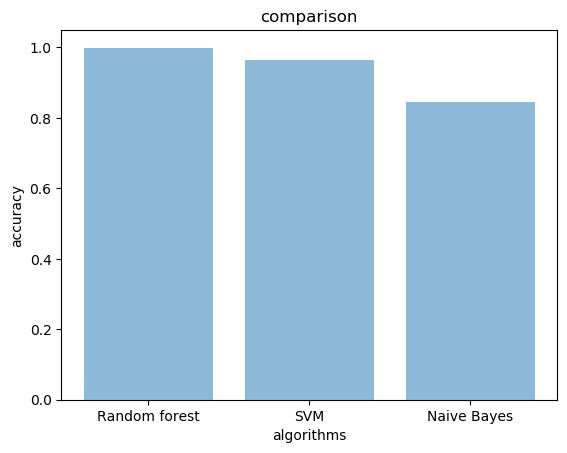

In [95]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Random forest', 'SVM', 'Naive Bayes')
y_pos = np.arange(len(objects))
performance = [rfaccuracy,svmaccuracy,nbaccuracy]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('algorithms')
plt.ylabel('accuracy')
plt.title('comparison')
 
plt.show()